# Spaghettification of the Magic School Bus

**Prepared by:** Logan Hennes (lhennes@nd.edu) and Joseph Emery (jemery@nd.edu)

**Reference:** This is an original problem created by the authors. With inspiration from Dr. Brian Olson's Problem Solving class.

**Intended Audience:** This problem is intended for sophomores or juniors from the University of Notre Dame who are taking an introductory physics course. 

## Learning Objectives

After studying this notebook, completing the activities, and asking questions in class, you should be able to:



*   Perform a degrees of freedom analysis
*   Solve a nonlinear system of equations using Newton's Method and Python tools
*   Properly visualize data using matplotlib




## Resources

Relevant Modules in Class Website:

1.5. [Functions and Scope](https://ndcbe.github.io/data-and-computing/notebooks/01/Functions-and-Scope.html)

6.1. [Modeling Systems of Nonlinear Equations: Flash Calculation Example](https://ndcbe.github.io/data-and-computing/notebooks/06/Modeling-Systems-of-Nonlinear-Equations.html)

6.2. [Newton-Raphson Method in One Dimension](https://ndcbe.github.io/data-and-computing/notebooks/06/Newton-Raphson-Method-in-One-Dimension.html#)

6.3. [More Newton-Type Methods](https://ndcbe.github.io/data-and-computing/notebooks/06/More-Newton-Type-Methods.html)

6.6. [Newton's Method in Scipy](https://ndcbe.github.io/data-and-computing/notebooks/06/Newton-Methods-in-Scipy.html)

## Import Libraries

In [6]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from matplotlib import ticker, cm

## Problem Statement

**Homework Problem**

Complete the following problem outside of class to practice the concepts discussed.



Ms. Frizzle and her students have boarded the Magic School Bus for an adventure in space. However, while exploring the Milky Way galaxy, an asteroid collided with the bus, hurtling the bus toward a black hole. Write a python script to find at what distance away the Magic School Bus needs to be to experience a certain amount of stretching by a black hole.

![](../../media/black_hole.png)

You will need to use Newton’s Law of Universal Gravitation and Youngs modulus.


$$F = G\frac{m_1m_2}{r^2}$$

$$∆L = \frac{1}{Y}\frac{F}{A}\ L_0 $$

$F$ = the force exerted on an object by gravity

$G$ = the gravitational constant

$m_1$ = the mass of the black hole

$m_2$ = the mass of the magic school bus

$r_1$ = the distance between the black hole and the front of the bus

$r_2$ = the distance between the black hole and the back of the bus

$\Delta L$ = the change in length of the bus

$Y$ = a measure of a solid's resistance to elastic deformation under a load (Young's Modulus)

$F$ = the force exerted on the object causing stretching

$A$ = cross-sectional area of the bus

$L_0$ = the length of the bus before stretching

## 1. Degree of Freedom Analysis

### 1.1. Setup

Define the constants used in this problem. Use scholarly sources such as NASA to determine the mass of the sun. Use the height of the bus as the diameter of your cylinder.

In [7]:
#Constants
Y = 69e9 # Youngs modulus for aluminum
m_2 = 15000 # Mass of school bus in kg
L_0 = 0.01 # length of school bus in km

#Add your solution here

In [8]:
### BEGIN SOLUTION
# Constants
Y = 69e9 # Youngs modulus for aluminum
m_2 = 15000 # Mass of school bus in kg
L_0 = 0.01 # length of school bus in km
# Add your solution here
G_standard = 6.67e-11  # Units N m^2/kg^2
G = G_standard/1000**2 # Units N m^2/kg^2
Solar_Mass = 1.989e30  # value of one solar mass in kg
m_1 = Solar_Mass * 4.154  # Mass of Milkyway Blackhole in kg

A = np.pi*(1.2192/1000)**2
### END SOLUTION

### 1.2. Analysis

Perform a degree of freedom analysis using the equations provided and the unknown variables. What does this analysis tell you? How should you approach the problem moving forward?

**Discuss** in 2-4 sentences

**Answer:**

Submit your written work via **Gradescope**.

## 2. Nonlinear Equation

### 2.1. Define a nonlinear equation

Using substitution, define one nonlinear equation $f(r_1, \Delta L)$. 

*Hint:* The definition of the function above suggests what the variables are.

Submit your answer and written work via **Gradescope**.

### 2.2. Create a plot and analyze

Using the nonlinear equation you derived in part a, write a function that calculates the residual of that function given some value of $r_1$ and some value of $\Delta L$. Then define an array of $r_1$ values labeled as r_1 and an array of $\Delta L$ values labeled Delta_L. Then use these arrays to calculate the residual for each pair of values.

Use the 3-D plot function in matplotlib to analyze the results.

In [ ]:
# Function for Nonlinear Equation Residual
def Residual_Function(r_1,ΔL):
    ''' Find residual using one Nonlinear equation
    
    Args:
        r_1, ΔL
        
    Returns:
        Residual    
    '''
  # Add your solution here
    Residual = 
    return Residual

SyntaxError: ignored

In [13]:
### BEGIN SOLUTION
# Function for Nonlinear Equation Residual
def Residual_Function(r_1,ΔL):
    ''' Find residual using one Nonlinear equation
  
  Args:
      r_1, ΔL
      
  Returns:
      Residual    
  '''
  # Add your solution here
    Residual =  L_0 / (Y * A) * G * m_1 * m_2 * (1/r_1**2 - 1/(L_0 + ΔL + r_1)**2) - ΔL
    return Residual
### END SOLUTION

Plot Residual:

In [10]:
# Create array
# Add your solution here

# Initialize Matrix
# Add your solution here

for i in range(len(r_1)):
  for j in range(len(ΔL)):
    r_grid[i,j] = r_1[i]
    # Add your solution here 

#Plot Figure
fig, ax = plt.subplots()
plt.xscale('log')

cs = ax.contourf(np.exp(r_grid), ΔL_grid, f_grid, locator=ticker.LogLocator(), cmap=cm.coolwarm, levels=100)

cbar = fig.colorbar(cs)
cbar.ax.set_ylabel('Residual', fontsize=16, fontweight='bold')
cbar.ax.tick_params(labelsize=16)

cs2 = plt.contour(cs, levels=cs.levels[::15], colors='k', alpha=0.7, linestyles='dashed', linewidths=3)

# plot heatmap label
plt.clabel(cs2, fmt='%2.2f', colors='k', fontsize=16)

# define tick size
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tick_params(direction="in",top=True, right=True)

# plot titile and x,y label
plt.xlabel('Distance (km)', fontsize=16, fontweight='bold')
plt.ylabel('ΔL (km)', fontsize=16, fontweight='bold')
plt.title('Contour of Residuals', fontsize=16, fontweight='bold')
plt.show()
### END SOLUTION

NameError: name 'r_1' is not defined

/var/folders/tk/4cs7tv315mq209yzyj47_wd80000gn/T/ipykernel_63148/1519745351.py:22: UserWarning: Log scale: values of z <= 0 have been masked
  cs = ax.contourf(np.exp(r_grid), ΔL_grid, f_grid, locator=ticker.LogLocator(), cmap=cm.coolwarm, levels=100)


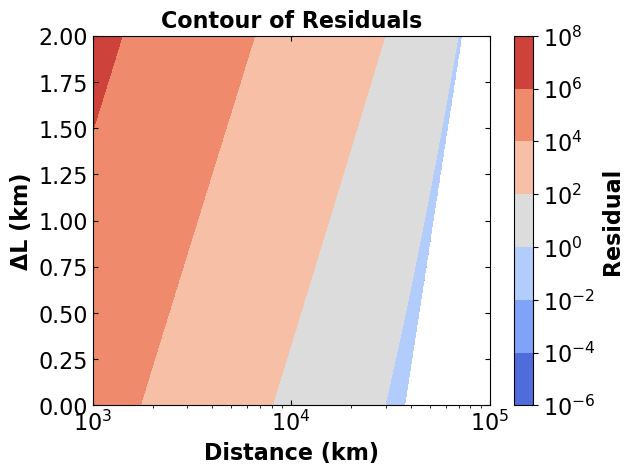

In [12]:
### BEGIN SOLUTION
# Create array
r_1 = np.linspace(np.log(1e3), np.log(1e5), 1000)
ΔL = np.linspace(0, 2, 1000)

# Initialize Matrix
r_grid = np.zeros((len(r_1), len(ΔL)))
ΔL_grid = np.zeros((len(r_1), len(ΔL)))
f_grid = np.zeros((len(r_1), len(ΔL)))

for i in range(len(r_1)):
  for j in range(len(ΔL)):
    # Add your solution here 
    r_grid[i,j] = r_1[i]
    ΔL_grid[i,j] = ΔL[j]
    f_grid[i,j] = Residual_Function(np.exp(r_1[i]), np.exp(ΔL[j]))

#Plot Figure
fig, ax = plt.subplots()
plt.xscale('log')

cs = ax.contourf(np.exp(r_grid), ΔL_grid, f_grid, locator=ticker.LogLocator(), cmap=cm.coolwarm, levels=100)

cbar = fig.colorbar(cs)
cbar.ax.set_ylabel('Residual', fontsize=16, fontweight='bold')
cbar.ax.tick_params(labelsize=16)

cs2 = plt.contour(cs, levels=cs.levels[::15], colors='k', alpha=0.7, linestyles='dashed', linewidths=3)

# plot heatmap label
plt.clabel(cs2, fmt='%2.2f', colors='k', fontsize=16)

# define tick size
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tick_params(direction="in",top=True, right=True)

# plot titile and x,y label
plt.xlabel('Distance (km)', fontsize=16, fontweight='bold')
plt.ylabel('ΔL (km)', fontsize=16, fontweight='bold')
plt.title('Contour of Residuals', fontsize=16, fontweight='bold')
plt.show()
### END SOLUTION

### 2.3. Discussion

What does the 3-D plot tell you about the solution? Are there multiple solutions?

**Discuss** in 1-3 sentences

## 3. Inexact Newton's Method

Typically, a body of aluminum can be subjected to 10% to 25% elongation before deformation becomes permanent (plastic deformation). For simplicity, we will define our maximum tolerance for stretching to be one meter. Solve for the distance when the bus experiences this stretching using the inexact Newton's Method.

You will need to write a new function for your nonlinear equation, $f(r_1)$, so that the only variable is $r_1$.

For more information on how to use the inexact Newton's Method, click [here](https://ndcbe.github.io/data-and-computing/notebooks/06/More-Newton-Type-Methods.html)

In [14]:
def inexact_newton(f,x0,delta = 1.0e-7, epsilon=1.0e-6, LOUD=False,max_iter=50):
    """Find the root of the function f via Newton-Raphson method
    Args:
        f: function to find root of [function]
        x0: initial guess [float]
        delta: finite difference parameter [float]
        epsilon: tolerance [float]
        LOUD: toggle on/off print statements [boolean]
        max_iter: maximum number of iterations [int]
        
    Returns:
        estimate of root [float]
    """
    
    assert callable(f), "Warning: 'f' should be a Python function"
    assert type(x0) is float or type(x0) is int, "Warning: 'x0' should be a float or integer"
    assert type(delta) is float, "Warning: 'delta' should be a float"
    assert type(epsilon) is float, "Warning: 'eps' should be a float"
    assert type(max_iter) is int, "Warning: 'max_iter' should be an integer"
    assert max_iter >= 0, "Warning: 'max_iter' should be non-negative"
    
    x = x0

    # print intial guess
    #if (LOUD):
        #print("x0 =",x0)
    
    iterations = 0
    converged = False
    
    # Check if the residual is close enough to zero
    while (not converged and iterations < max_iter):
        
        # evaluate function 'f' at new 'x'
        fx = f(x)
        
        # calculate 'slope'
        slope = (f(x+delta)-f(x))/delta
        
        # print every iteration
        #if (LOUD):
            #print("x_",iterations+1,"=",x,"-",fx,"/",slope,"=",x - fx/slope)
        x = x - fx/slope
        
        iterations += 1
        
        # check if converged
        if np.fabs(f(x)) < epsilon:
            converged = True
            
    if (LOUD):
      print("It took",iterations,"iterations")
    
    if not converged:
        print("Warning: Not a solution. Maximum number of iterations exceeded.")
    return x #return estimate of root

In [15]:
# Set Value of ΔL
ΔL = 1
guess = 1000

# Add your solution here

In [ ]:
# Use inexact newton method
# Add your solution here

In [16]:
### BEGIN SOLUTION
# Set Value of ΔL
ΔL = 1
guess = 1000

# Add your solution here
canonical_form = lambda r_1: (ΔL) / (Y * A) * G * m_1 * m_2 * (1/r_1**2 - 1/(L_0 + ΔL + r_1)**2) - ΔL
### END SOLUTION

In [17]:
### BEGIN SOLUTION
# use inexact newton method

newton_sln = inexact_newton(canonical_form, guess, epsilon=1e-2, LOUD=True)
print('The result of the inexact newton function is', newton_sln)
### END SOLUTION

It took 17 iterations
The result of the inexact newton function is 37288.98540252285


## 4. Newton's Method using Scipy

Now we have a working estimate for the correct result. Let's use one of the functions in scipy to solve for the distance at which the bus experiences one meter of stretching.


### 4.1. Setup equations

When using Newton's Method in Scipy, the derivative of $f(r_1)$ is required to determine the solution. Calculate the derivative of $f(r_1)$ and define it as a function.

Submit your written work via **Gradescope**

In [18]:
# Set Value of ΔL
ΔL = 1
guess = 1000

def derivative_form(r_1):
    ''' Find max distance using canonical derivative
    
    Args:
        r_1
        
    Returns:
        derivative    
    '''

    ### BEGIN SOLUTION
    derivative = (ΔL) / (Y * A) * G * m_1 * m_2 * (2/(L_0 + ΔL + r_1)**3 - 2/r_1**3)
    ### END SOLUTION
    return derivative

### 4.2. Use Scipy to determine $r_1$

In [19]:
# use scipy method
### BEGIN SOLUTION

scipy_sln = optimize.newton(func=canonical_form, x0 = guess, fprime=derivative_form, tol=1e-2, full_output=True)
print('The result of the scipy optimize newton function is \n',scipy_sln)
### END SOLUTION

The result of the scipy optimize newton function is 
 (37282.16059433723,       converged: True
           flag: converged
 function_calls: 36
     iterations: 18
           root: 37282.16059433723)


## 5. Analysis and Comparison of Each Method

### 5.1. Test the inexact Newton's Method 

Test the inexact Newton's Method function with guesses of different orders of magnitude. Find a guess that gives you a solution and a guess that doesn't give you a solution. You should continue adjusting your initial guess until you get an error.

In [ ]:
# Initial Guess

### BEGIN SOLUTION
guess1 = 1e2
### END SOLUTION

newton_sln1 = inexact_newton(canonical_form, guess1, epsilon=1.0e-2, LOUD=True)
print("The root using the inexact newton function for guess2 is found at", newton_sln1)

Try Newtons inexact with a very large guess to see if the function fails.

In [ ]:
# Higher Guess

### BEGIN SOLUTION
guess2 = 1e3
### END SOLUTION

newton_sln2 = inexact_newton(canonical_form, guess2, epsilon=1.0e-2, LOUD=True)
print("The root using the inexact newton function for guess2 is found at", newton_sln2)

In [ ]:
### BEGIN SOLUTION
guess3 = 1e4
### END SOLUTION

newton_sln3 = inexact_newton(canonical_form, guess3, epsilon=1.0e-2, LOUD=True)
print("The root using the inexact newton function for guess3 is found at", newton_sln3)


It took 23 iterations
The root using the inexact newton function for guess1 is found at 37459.136814048645
It took 15 iterations
The root using the inexact newton function for guess2 is found at 37407.4751508785
It took 7 iterations
The root using the inexact newton function for guess3 is found at 37424.27645628167


### 5.1.1 Discussion

How do different orders of magnitude change result from guess? How do the number of iterations change?

**Discuss** in 2-4 sentences

**Answer:**

### 5.2. Finding the limits of inexact Newton's Method

Determine the upper and lower limit for your guess where the inexact Newton's Method function gives you a usable solution. Continue making your guess larger until you get an error. The error is your upper limit. Then do the same for the lower limit.


In [ ]:
# Find the upper limit using inexact newton method

### BEGIN SOLUTION
upper_limit_inexact = 5.9326e4
### END SOLUTION

inexact_newton(canonical_form, upper_limit_inexact, epsilon = 1.0e-2)


In [ ]:
# Find the lower limit using inexact newton method

### BEGIN SOLUTION
lower_limit_inexact = 7.7240e-3
### END SOLTUON

inexact_newton(canonical_form, lower_limit_inexact, epsilon = 1.0e-2)

In [ ]:
print('The range of guesses that you can use for the inexact newton method is', lower_limit_inexact, 'km < guess <', upper_limit_inexact, 'km')

The range of guesses that you can use for the inexact newton method is 0.007724 km < guess < 59326.0 km


### 5.3. Test Newton's Method with Scipy

Now do similar tests using the same numbers for the optimize.newton function in scipy. Find a guess that gives you a solution and a guess that doesn't give you a solution. For the incorrect guess, you should get an error.

In [ ]:
# Initial Guess
### BEGIN SOLUTION
guess1 = 1e2
### END SOLUTION

scipy_sln1 = optimize.newton(func=canonical_form, x0 = guess1, fprime=derivative_form, tol=1e-2, full_output=True)


Try scipy with a very large guess to see if the function fails.

In [ ]:
# higher Guess
### BEGIN SOLUTION
guess2 = 1e3
### END SOLTUION
scipy_sln2 = optimize.newton(func=canonical_form, x0 = guess2, fprime=derivative_form, tol=1e-2, full_output=True)


In [ ]:
# even larger guess
### BEGIN SOLUTION
guess3 = 1e5
### END SOLUTION
scipy_sln3 = optimize.newton(func=canonical_form, x0 = guess3, fprime=derivative_form, tol=1e-2, full_output=True)

The result of guess1 is 
 (37406.024180626926,       converged: True
           flag: 'converged'
 function_calls: 52
     iterations: 26
           root: 37406.024180626926) 

The result of guess2 is 
 (37406.02418060243,       converged: True
           flag: 'converged'
 function_calls: 36
     iterations: 18
           root: 37406.02418060243) 

The result of guess3 is 
 (37406.02418060992,       converged: True
           flag: 'converged'
 function_calls: 20
     iterations: 10
           root: 37406.02418060992)


In [ ]:
print('The result of guess1 is \n', scipy_sln1, '\n')
print('The result of guess2 is \n', scipy_sln2, '\n')
print('The result of guess3 is \n', scipy_sln3)

In [ ]:
# Initial Guess
guess = 1e6

scipy_sln = optimize.newton(func=canonical_form, x0 = guess, fprime=derivative_form, tol=1e-2)
print("The root is found at",scipy_sln)


RuntimeError: ignored

### 5.3.1 Discussion

How do different orders of magnitude change the result from guess? How do the number of iterations change?

**Discuss** in 2-4 sentences

**Answer:**

### 5.4. Finding the limits of Newton's Method with Scipy

Determine the upper and lower limit for your guess where the optimize.newton function in scipy gives you a useable solution.

In [ ]:
# Find the upper limit using scipy method
upper_limit_scipy = 2.9e5

while True:
  try:
    upper_limit_scipy += 1
    optimize.newton(func = canonical_form, x0 = upper_limit_scipy, fprime = derivative_form, tol=1e-2)
  except:
    print(upper_limit_scipy)
    break   

In [ ]:
# Find the lower limit using scipy method
lower_limit_scipy = 1e3

while True:
  try:
    lower_limit_scipy -= 1
    optimize.newton(func = canonical_form, x0 = lower_limit_scipy, fprime = derivative_form, tol=1e-2)
  except:
    print(lower_limit_scipy)
    break  


In [ ]:
print('optimize.newton function from scipy works over', lower_limit_scipy, 'km < guess <', upper_limit_scipy, 'km')


optimize.newton function from scipy works over 0.0 km < guess < 290001.0 km


### 5.5. Discussion

Over what range of guesses will the inexact newton function give you a result? Over what range of guesses will the optimize.newton function from scipy gives you a result? Which of the ranges is bigger? Which method uses fewer iterations?

**Discuss** in 2-4 sentences

**Answer:**

In [75]:
import numpy as np
np.power((2 * G * m_1 * m_2 * L_0 * (L_0 + ΔL)) / (ΔL * Y * A), 1/3)

8032.306808344096

In [72]:
r = 100000
l = 1

In [73]:
(G * m_1 * m_2) / (r - l)**2 - (G * m_1 * m_2) / (r + l)**2

33065.74861860275

In [74]:
(4 * G * m_1 * m_2 * l ) / r**3

33065.748611999996